<a href="https://colab.research.google.com/github/basshopee/net_rate/blob/main/com_status_net_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip3 install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from  scipy.stats import skew, kurtosis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import datetime

# deep learning
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/My Drive/net_rate/order_fe_status.csv')
df = df[df.grass_date != '9999-01-01']
df.reset_index(inplace=True, drop=True)
df['grass_date']= pd.to_datetime(df['grass_date'])
df2 = df
df = df.set_index(['grass_date'])
df = df.sort_index()
df

,order_fe_status,count
grass_date,,
2015-05-22,CANCELLED,8
2015-05-23,CANCELLED,18
2015-05-24,CANCELLED,1
2015-05-25,COMPLETED,12
2015-05-25,CANCELLED,33
...,...,...
2021-06-19,CANCELLED,273844
2021-06-20,CANCELLED,265075
2021-06-20,TO_PAY,1


In [5]:
df2

,grass_date,order_fe_status,count
0,2021-06-20,COMPLETED,1652168
1,2021-06-20,TO_RECEIVE,10
2,2021-06-20,TO_PAY,1
3,2021-06-20,CANCELLED,265075
4,2021-06-19,CANCELLED,273844
...,...,...,...
5620,2015-05-25,CANCELLED,33
5621,2015-05-25,COMPLETED,12
5622,2015-05-24,CANCELLED,1
5623,2015-05-23,CANCELLED,18


In [6]:
dff = pd.DataFrame()
dff['count'] = df['count'].copy()
dff['status'] = df['order_fe_status']
dff = dff.groupby(['status']).sum().reset_index()
dff

,status,count
0,ALL,30
1,CANCELLED,229169981
2,COMPLETED,1033968957
3,TO_PAY,2155
4,TO_RECEIVE,26042
5,TO_SHIP,221


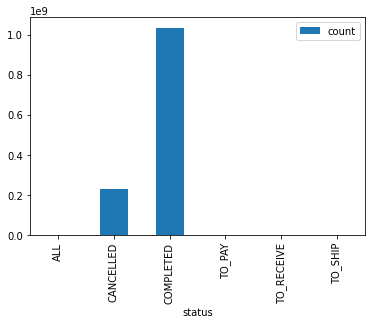

In [7]:
dff.plot.bar(x='status', y='count')

In [8]:
status = ['CANCELLED','COMPLETED']
df_com = df.loc[df['order_fe_status'].isin(status)]
print(df_com)
cancel = df_com[df_com['order_fe_status']=='CANCELLED']
cancel.drop('order_fe_status', axis=1, inplace=True)
cancel.rename(columns={'count':'cancel'}, inplace=True)

complete = df_com[df_com['order_fe_status']=='COMPLETED']
complete.drop('order_fe_status', axis=1, inplace=True)
complete.rename(columns={'count':'complete'}, inplace=True)


           order_fe_status    count
grass_date                         
2015-05-22       CANCELLED        8
2015-05-23       CANCELLED       18
2015-05-24       CANCELLED        1
2015-05-25       COMPLETED       12
2015-05-25       CANCELLED       33
...                    ...      ...
2021-06-18       CANCELLED   282266
2021-06-19       COMPLETED  1956307
2021-06-19       CANCELLED   273844
2021-06-20       CANCELLED   265075
2021-06-20       COMPLETED  1652168

[4368 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df1=pd.DataFrame()
df1['date'] = df_com.index.copy()
df1 = df1.set_index(['date'])
df1['complete'] = complete
df1['cancel'] = cancel
df1.fillna(0, inplace=True)
df1 = df1[df1.index.duplicated(keep='first')]
rate = df1['complete']/(df1['complete']+df1['cancel']) # complete rate calculation
df1['net_rate']=rate
net_rate = df1.drop(['complete','cancel'],axis=1)
net_rate

,net_rate
date,
2015-05-25,0.266667
2015-06-02,0.222222
2015-06-03,0.285714
2015-06-04,0.724138
2015-06-05,0.473684
...,...
2021-06-16,0.864180
2021-06-17,0.891291
2021-06-18,0.888084


In [10]:
net_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2146 entries, 2015-05-25 to 2021-06-20
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   net_rate  2146 non-null   float64
dtypes: float64(1)
memory usage: 33.5 KB


# Data Visualisation

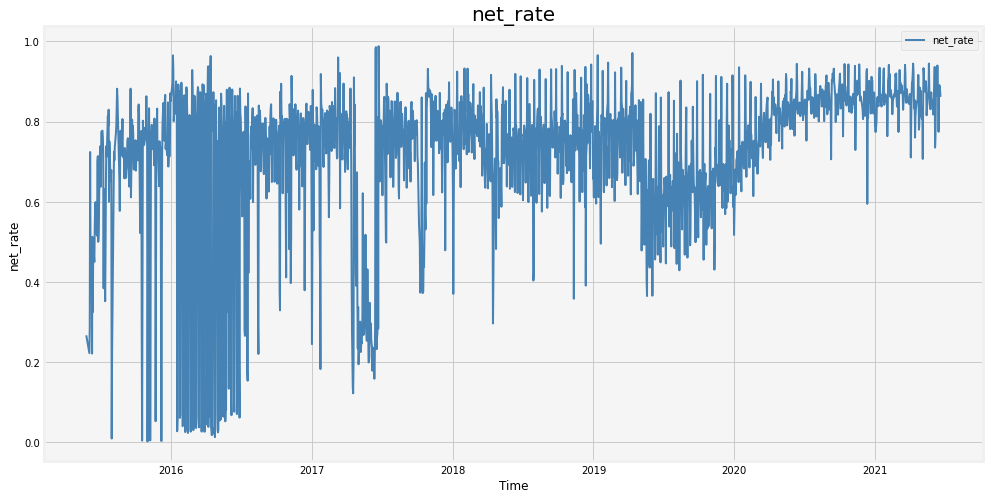

In [11]:
# Plot Data
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 8) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color
plt.plot(net_rate,label = 'net_rate',color="steelblue", linestyle="-", linewidth=2.0) # plot with set the line width,shape and color
plt.legend()

plt.xlabel("Time")
plt.ylabel("net_rate")
plt.title("net_rate", fontsize = 20)
#plt.grid(color="k", linestyle=":") # set grid and line shape

# plt.savefig('Daily cases.png')
plt.show()

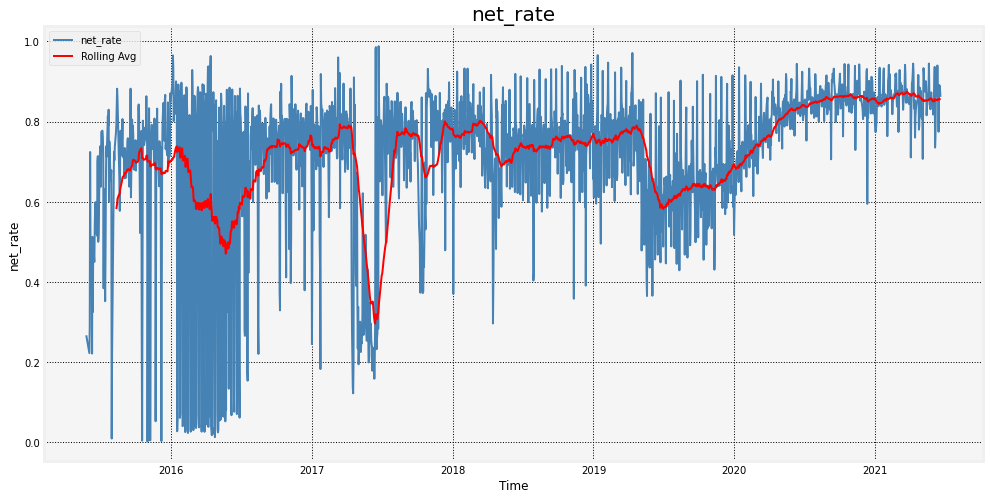

In [12]:
# Rolling Average
df_roll = net_rate.rolling(window=50).mean()

# Plot Data
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 8) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color
plt.plot(net_rate,label = 'net_rate',color="steelblue", linestyle="-", linewidth=2.0) # plot with set the line width,shape and color
plt.plot(df_roll['net_rate'], label = 'Rolling Avg', color="Red", linewidth=2.0)
plt.legend()

plt.xlabel("Time")
plt.ylabel("net_rate")
plt.title("net_rate", fontsize = 20)
plt.grid(color="k", linestyle=":") # set grid and line shape

# plt.savefig('Daily cases.png')
plt.show()

# Exploration Data Analysis (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


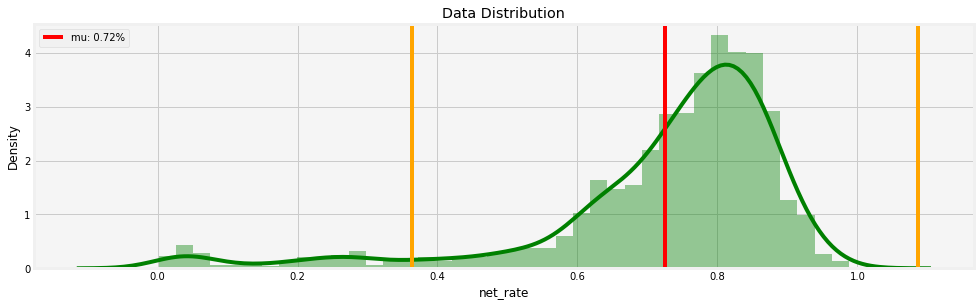

In [13]:
# Plot Distribution

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 4.5) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color

sns.distplot(net_rate['net_rate'],color='g')

plt.title("Data Distribution")
plt.xlabel("net_rate")

mean = np.mean(net_rate['net_rate'])
std = np.std(net_rate['net_rate'])
plt.axvline(x=mean, color='r', linestyle='-', label="mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
# plt.grid(color="k", linestyle=":") # set grid and line shape
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


Text(0, 0.5, 'seasonal')

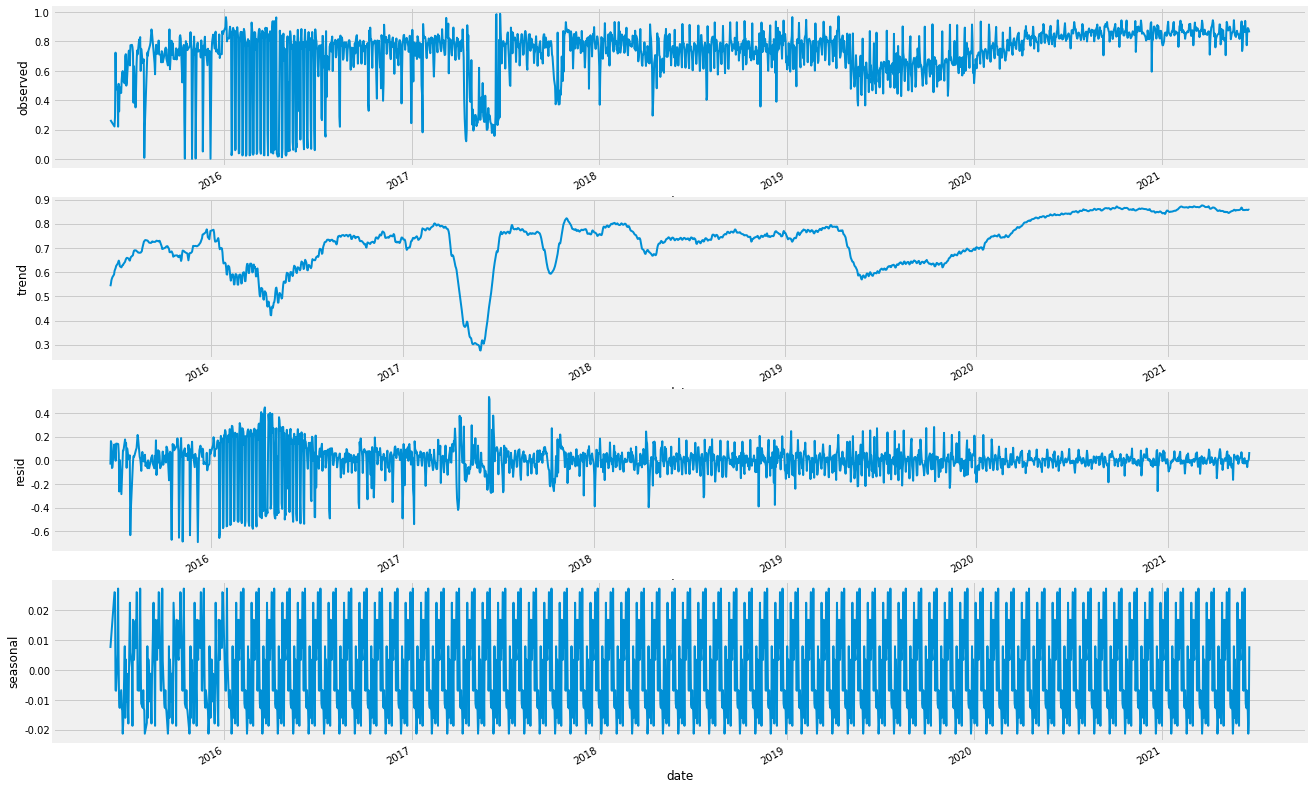

In [14]:
# Data decomposition
res = seasonal_decompose(net_rate, model='additive',freq=30)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,15))
res.observed.plot(ax=ax1,linewidth=2)
ax1.set_ylabel('observed')
res.trend.plot(ax=ax2,linewidth=2)
ax2.set_ylabel('trend')
res.resid.plot(ax=ax3,linewidth=2)
ax3.set_ylabel('resid')
res.seasonal.plot(ax=ax4,linewidth=2)
ax4.set_ylabel('seasonal')

# Exponential Smoothing

In [15]:
# simple exponential smoothing(one-step-ahead-prediction)
def mape(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape
def sse(x, y):
    return np.sum(np.power(x-y,2))

alphas = np.arange(0.01,1,0.001)
sse_al = []
for alpha_i in alphas:
  ses_i = net_rate.ewm(alpha = alpha_i, adjust=False).mean()
  sse_al.append(sse(net_rate[1:].values, ses_i[:-1].values))
alpha_opt = alphas[np.argmin(sse_al)]
print(" Optimal Alpha for 1 - step forecast: {:.3f}".format(alpha_opt))

 Optimal Alpha for 1 - step forecast: 0.116


            net_rate  net_rate_exp
date                              
2015-05-25  0.266667      0.266667
2015-06-02  0.222222      0.257778
2015-06-03  0.285714      0.263365
2015-06-04  0.724138      0.355520
2015-06-05  0.473684      0.379153
...              ...           ...
2021-06-15  0.774701      0.851996
2021-06-16  0.864180      0.854433
2021-06-17  0.891291      0.861804
2021-06-18  0.888084      0.867060
2021-06-19  0.877208      0.869090

[2145 rows x 2 columns]


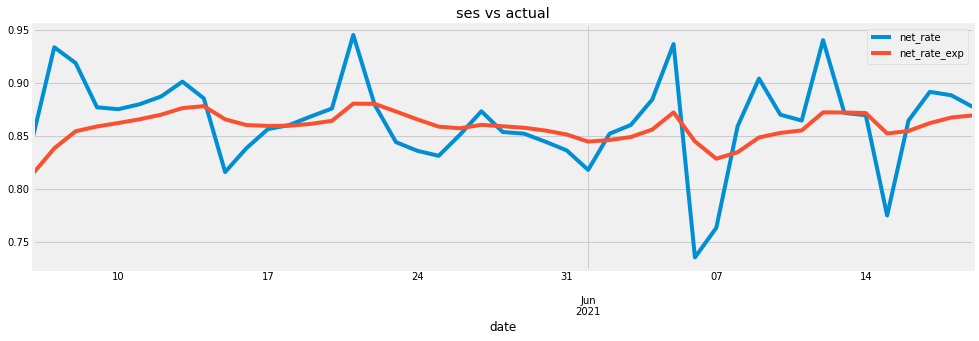

In [16]:
y = net_rate['net_rate'][:len(net_rate)-1]
y = y.reset_index(drop=True)

alpha_opt = 0.2
a = alpha_opt

lt_manual = [y[0]] # l0 = first observation
prediction=[] # obtain prediction values
count=0
for t in range(1,len(y)+1):
    count=count+1
    # Calculate smoothed value at time t
    if t < len(y):
        l_t = a*y[t]+(1-a)*lt_manual[t-1]
        lt_manual.append(l_t)
    else:
        yp=l_t
        pred = a*yp+(1-a)*lt_manual[t-1] # make prediction
        prediction.append(pred)

df2 = net_rate[net_rate.index!='2021-06-20']
df2 = df2.reset_index()
df2['net_rate_exp'] = lt_manual
df2.set_index('date',inplace=True)
print(df2)
df2[2100:].plot(title='ses vs actual')

In [17]:
actual = net_rate['net_rate']['2021-06-20']
d = {'grass_date':'2021-06-20', 'actual': [actual], 'prediction': prediction}
result = pd.DataFrame(d)
result.set_index(['grass_date'], inplace=True)
result

,actual,prediction
grass_date,,
2021-06-20,0.861742,0.86909


In [18]:
# check graph
# ses = df.ewm(alpha=alpha_opt, adjust=False).mean()[len(df_train):len(df)-1]
# result=df_val.copy()
# result['ses'] = ses
# result.plot(title='ses vs actual')

# Split data

In [19]:
df_val = net_rate.loc[net_rate.index > '2021-05-20']
df_train = net_rate.loc[net_rate.index <= '2021-05-20']   

In [20]:
# Normalization
# norm = MinMaxScaler(feature_range = (0,1))
# df_array = norm.fit_transform(df)

In [21]:
df_array = df_train.to_numpy()
day=60 # train and 1 output
x_train = []
y_train = []
for i in range(day,len(df_array)):
  x_train.append(df_array[i-day:i,0])
  y_train.append(df_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# LSTM

In [22]:
# parameter
drop = 0.3
epochs = 50
batch_size = 32

In [23]:
# Initialising LSTM
model = Sequential()

# First layer(input)
model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1],1))) # return_sequences=True because we are using LSTM
model.add(Dropout(drop))

# Second layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(drop))

# Third layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(drop))

# Fourth layer
model.add(LSTM(units=50))
model.add(Dropout(drop))

# Output layer
model.add(Dense(units=1))

# Optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting
model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50
65/65 [==============================] - 25s 14ms/step - loss: 0.1467
Epoch 2/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0343
Epoch 3/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0351
Epoch 4/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0326
Epoch 5/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0325
Epoch 6/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0302
Epoch 7/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0313
Epoch 8/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0323
Epoch 9/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0267
Epoch 10/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0302
Epoch 11/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0296
Epoch 12/50
65/65 [==============================] - 1s 12ms/step - loss: 0.0295
Epoch 13/50
65/65 [=================

**Prediction**

In [24]:
df_total = pd.concat((df_train,df_val),axis=0)
inputs = df_total[len(df_total)-len(df_val)-day:].to_numpy() # inputs start #day before validation set start
inputs = inputs.reshape(-1,1)
# inputs = norm.fit_transform(inputs)
x_test = []
for i in range(day,day+len(df_val)):
  x_test.append(inputs[i-day:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Make prediction
prediction = model.predict(x_test)

# Inverse normalization
# prediction = norm.inverse_transform(prediction)

prediction = pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       31 non-null     float32
dtypes: float32(1)
memory usage: 252.0 bytes


In [25]:
# Compare Table
result = df_val.copy()
result['prediction'] = prediction.values
print(result)

            net_rate  prediction
date                            
2021-05-21  0.944904    0.834725
2021-05-22  0.879211    0.835114
2021-05-23  0.843872    0.835984
2021-05-24  0.835711    0.837115
2021-05-25  0.830998    0.838122
2021-05-26  0.850932    0.838652
2021-05-27  0.873001    0.838587
2021-05-28  0.853438    0.838083
2021-05-29  0.851847    0.837289
2021-05-30  0.844284    0.836318
2021-05-31  0.836031    0.835216
2021-06-01  0.817692    0.833966
2021-06-02  0.851784    0.832456
2021-06-03  0.860099    0.830759
2021-06-04  0.884038    0.829071
2021-06-05  0.936399    0.827707
2021-06-06  0.735210    0.827198
2021-06-07  0.763073    0.826950
2021-06-08  0.858985    0.826200
2021-06-09  0.903822    0.824864
2021-06-10  0.869760    0.823430
2021-06-11  0.864224    0.822309
2021-06-12  0.940065    0.821720
2021-06-13  0.871377    0.822099
2021-06-14  0.869279    0.823445
2021-06-15  0.774701    0.825492
2021-06-16  0.864180    0.827422
2021-06-17  0.891291    0.828875
2021-06-18

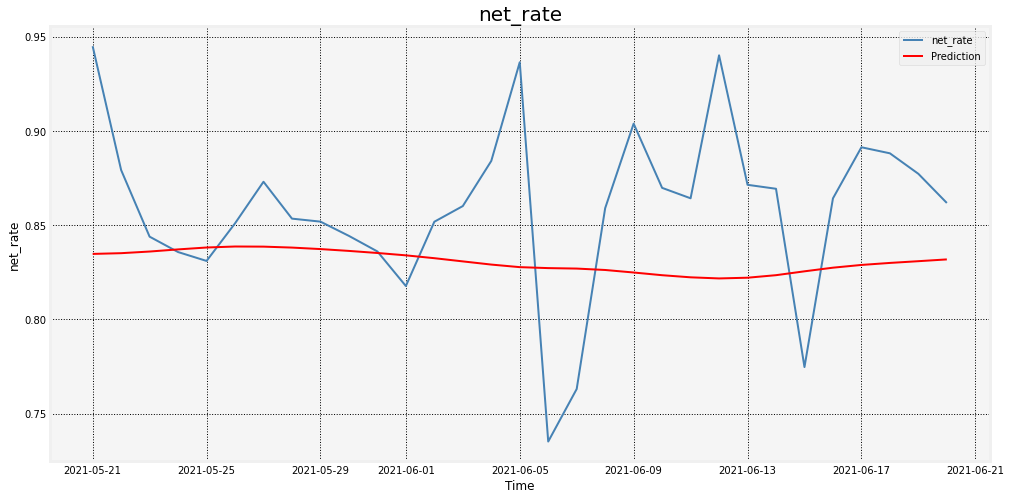

In [26]:
# Plot Data
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 8) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color
plt.plot(result['net_rate'],label = 'net_rate',color="steelblue", linestyle="-", linewidth=2.0) # plot with set the line width,shape and color
plt.plot(result['prediction'], label = 'Prediction', color="Red", linewidth=2.0)
plt.legend()

plt.xlabel("Time")
plt.ylabel("net_rate")
plt.title("net_rate", fontsize = 20)
plt.grid(color="k", linestyle=":") # set grid and line shape

# plt.savefig('Daily cases.png')
plt.show()

# ARIMA

In [27]:
Arima_data = net_rate.copy()
Arima_validation_data = net_rate[-15:]
Arima_train_data = net_rate[:-15]

In [28]:
from pmdarima import auto_arima
stepwise_model = auto_arima(Arima_train_data, start_p=0, start_q=0,
                           max_p=4, max_q=4, m=7,
                           start_P=0,start_Q=0,max_Q=4,max_P=4,seasonal=True,d=1, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-1560.473, Time=0.33 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-2140.197, Time=1.37 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-2300.358, Time=2.02 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-1562.466, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-2024.367, Time=1.71 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=-2952.753, Time=4.50 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=-2478.457, Time=3.44 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=-2945.650, Time=8.34 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=-2894.924, Time=9.19 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=-2451.248, Time=5.95 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=-2687.317, Time=5.01 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=-2952.362, Time=11.04 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-2368.666, Time=3.08 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=-3092.304, Time=4.91 sec
 ARIMA(1,1,1)(0,0,

In [29]:
stepwise_model.fit(Arima_train_data)
forecast = stepwise_model.predict(n_periods=len(Arima_validation_data))
forecast = pd.DataFrame(forecast, index = Arima_validation_data.index, columns = ['forecast'])
forecast['actual']=Arima_validation_data
forecast

,forecast,actual
date,,
2021-06-06,0.870054,0.735210
2021-06-07,0.854289,0.763073
2021-06-08,0.853798,0.858985
2021-06-09,0.856414,0.903822
2021-06-10,0.868037,0.869760
2021-06-11,0.889122,0.864224
2021-06-12,0.882387,0.940065
2021-06-13,0.854290,0.871377
2021-06-14,0.850348,0.869279


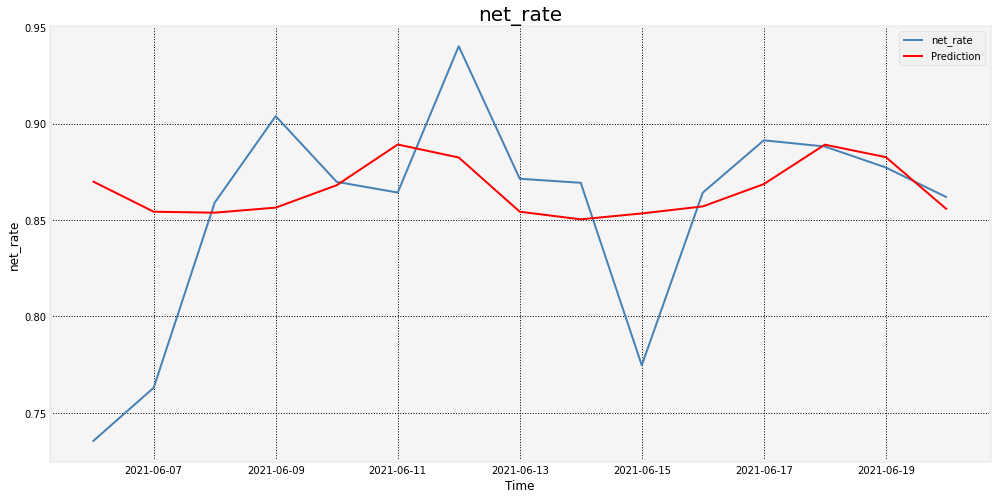

In [30]:
# Plot Data
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 8) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color
plt.plot(forecast['actual'],label = 'net_rate',color="steelblue", linestyle="-", linewidth=2.0) # plot with set the line width,shape and color
plt.plot(forecast['forecast'], label = 'Prediction', color="Red", linewidth=2.0)
plt.legend()

plt.xlabel("Time")
plt.ylabel("net_rate")
plt.title("net_rate", fontsize = 20)
plt.grid(color="k", linestyle=":") # set grid and line shape

# plt.savefig('Daily cases.png')
plt.show()

# Future Prediction with ARIMA

In [71]:
Arima_data = net_rate.copy()
Arima_train_data = net_rate.copy()
Arima_plot_data = net_rate[-14:]

In [32]:
from pmdarima import auto_arima
stepwise_model = auto_arima(Arima_train_data, start_p=0, start_q=0,
                           max_p=4, max_q=4, m=7,
                           start_P=0,start_Q=0,max_Q=4,max_P=4,seasonal=True,d=1, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-1583.598, Time=0.21 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-2166.432, Time=1.36 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-2329.365, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-1585.592, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-2051.624, Time=0.61 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=-2985.584, Time=4.39 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=-2508.509, Time=1.82 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=-2904.828, Time=7.97 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=-2987.449, Time=8.90 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=-2481.245, Time=5.40 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=-2985.414, Time=10.53 sec
 ARIMA(0,1,1)(1,0,3)[7] intercept   : AIC=-2971.374, Time=14.41 sec
 ARIMA(0,1,1)(0,0,3)[7] intercept   : AIC=-2571.179, Time=12.90 sec
 ARIMA(0,1,1)(2,0,3)[7] intercept   : AIC=-2986.447, Time=22.99 sec
 ARIMA(0,1,0)(1

In [33]:
start_date = datetime.date(2021, 6 , 21)
number_of_days = 7

date_list = [(start_date + datetime.timedelta(days = day)).isoformat() for day in range(number_of_days)]

date_list = pd.DataFrame(date_list, columns = ['date'])
date_list # prediction date

,date
0,2021-06-21
1,2021-06-22
2,2021-06-23
3,2021-06-24
4,2021-06-25
5,2021-06-26
6,2021-06-27


In [48]:
stepwise_model.fit(Arima_train_data)
future = stepwise_model.predict(n_periods= number_of_days)
future = pd.DataFrame(future, index = date_list.date, columns = ['future'])
future.index= pd.to_datetime(future.index)
future

,future
date,
2021-06-21,0.848820
2021-06-22,0.842874
2021-06-23,0.866338
2021-06-24,0.873340
2021-06-25,0.884853
2021-06-26,0.889473
2021-06-27,0.844734


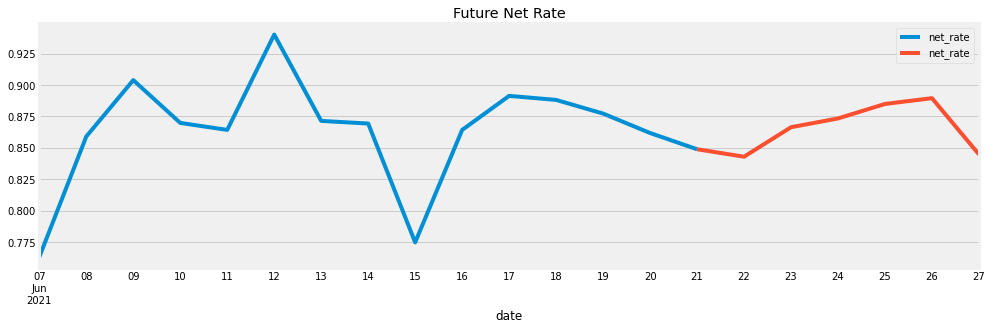

In [72]:
future.rename(columns={'future':'net_rate'}, inplace=True)
Arima_plot = Arima_plot_data.append(future.head(1))
pd.concat([Arima_plot,future],axis=1).plot(title = 'Future Net Rate',figsize=(15, 4.5))